Question – 1:

You are supposed to choose a dataset (DS1) of your own choice. You may collect this data from any data source (such as an online, physical archive, survey or review papers, interviews, or workshops etc.). It must consist of nominal, ordinal, interval, or categorical features values. You are required to apply the following techniques:

i.	Apply possible data preprocessing techniques.

ii.	Apply any two unsupervised learning techniques (even if the data is labeled) along with clustering validation techniques to ensure the validity of clusters.

iii.	Apply either of the feature selection techniques. Choose the resultant feature set of any one technique to proceed for the further experiments.  

iv.	Apply imbalance learning techniques (any of the two) on your dataset to balance tha data if it is imbalanced.

v.	Apply any five supervised learning classifiers (either linear or non-linear). Try to use boosting algorithms (it will be a plus point).  

vi.	Illustrate the results of various performance measures (accuracy, precision, recall, f1-sore, classification report, and confusion matrix) for each of the classifiers.

vii.	Take one more dataset (DS2) of your own choice, apply the automated features extraction technique (any two), and report on the accuracy of applying classification techniques on this DS2 after applying feature extraction.

viii.	Place your whole content (dataset, code files, results, images, etc.) on your GitHub profile.

ix.	Take one more dataset (DS3) for those whose dataset was a balanced dataset, they are mandatory to chose DS3 of your own choice and apply any two data balancing techniques along with reporting the performance results (of any one or two algorithms of your own choice) before and after balancing the dataset.


1. Setup & Load Dataset

In [12]:
# Step 1: Install required libraries
!pip install pandas scikit-learn matplotlib seaborn imbalanced-learn
!pip install flask-ngrok
!pip install -U flask

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 3: Load dataset
url = '//content/D1_adult_cencus_income_data.csv'
df = pd.read_csv(url)
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


2. Data Preprocessing

In [13]:
# Handle missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Split data
X = df.drop('income', axis=1)
y = df['income']


3. Unsupervised Learning + Clustering Validation

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
print("KMeans Silhouette Score:", silhouette_score(X, kmeans_labels))

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
print("DBSCAN Silhouette Score:", silhouette_score(X, dbscan_labels))


KMeans Silhouette Score: 0.1878018498581608
DBSCAN Silhouette Score: 0.08359523160392951


4. Feature Selection

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Step 1: Rescale data to [0, 1] range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("Step 1: Scaled data shape:", X_scaled.shape)

# Step 2: Select top 10 features using chi2
selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X_scaled, y)
print("Step 2: Selected data shape:", X_selected.shape)

# Step 3: Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Step 3: Selected feature names:\n", selected_features.tolist())

# Optional: Show chi2 scores
feature_scores = pd.Series(selector.scores_, index=X.columns)
print("\nChi2 Scores for all features:\n", feature_scores.sort_values(ascending=False))

# Replace X with the selected features DataFrame
X = pd.DataFrame(X_selected, columns=selected_features)


Step 1: Scaled data shape: (30162, 14)
Step 2: Selected data shape: (30162, 10)
Step 3: Selected feature names:
 ['age', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week']

Chi2 Scores for all features:
 capital.gain      741.289330
relationship      687.097612
sex               459.346270
capital.loss      288.360595
age               194.716442
marital.status    163.730437
education.num     161.141412
hours.per.week     58.251827
education          17.643490
occupation         16.814870
race                7.333278
workclass           0.677171
native.country      0.418254
fnlwgt              0.104330
dtype: float64


5. Handle Imbalanced Dataset

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_adult_preprocessed, y_adult_preprocessed)

# Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_adult_preprocessed, y_adult_preprocessed)

# Print class distributions for comparison
from collections import Counter
print("Original Class Distribution:", Counter(y_adult_preprocessed))
print("After SMOTE (Oversampling):", Counter(y_smote))
print("After Random Under Sampling:", Counter(y_under))


Original Class Distribution: Counter({0: 22654, 1: 7508})
After SMOTE (Oversampling): Counter({0: 22654, 1: 22654})
After Random Under Sampling: Counter({0: 7508, 1: 7508})


Compare Classifier Performance on Both Sets

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

def evaluate_model(X_resampled, y_resampled, label, save_model=False, model_filename="model.pkl"):
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nPerformance on {label}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    if save_model:
        joblib.dump(model, "adult_cencus_income")
        print(f"Model saved to {model}")

# Evaluate on SMOTE data (preprocessed Adult dataset)
evaluate_model(X_smote, y_smote, "SMOTE Oversampled Data", save_model=True, model_filename="adult_model.pkl")

# Evaluate on Undersampled data (preprocessed Adult dataset)
evaluate_model(X_under, y_under, "Undersampled Data")



Performance on SMOTE Oversampled Data:
Accuracy: 0.8787243434120503
Confusion Matrix:
 [[3957  597]
 [ 502 4006]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4554
           1       0.87      0.89      0.88      4508

    accuracy                           0.88      9062
   macro avg       0.88      0.88      0.88      9062
weighted avg       0.88      0.88      0.88      9062

Model saved to RandomForestClassifier(random_state=42)

Performance on Undersampled Data:
Accuracy: 0.8202396804260985
Confusion Matrix:
 [[1217  291]
 [ 249 1247]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1508
           1       0.81      0.83      0.82      1496

    accuracy                           0.82      3004
   macro avg       0.82      0.82      0.82      3004
weighted avg       0.82      0.82      0.82      3004



6. Supervised Learning with 5 Classifiers (with Boosting)

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Use the preprocessed + SMOTE-resampled Adult dataset
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\nModel: {name}")
    print(f"Accuracy       : {accuracy_score(y_test, preds):.4f}")
    print(f"Precision      : {precision_score(y_test, preds):.4f}")
    print(f"Recall         : {recall_score(y_test, preds):.4f}")
    print(f"F1 Score       : {f1_score(y_test, preds):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))



Model: Logistic Regression
Accuracy       : 0.7609
Precision      : 0.7567
Recall         : 0.7653
F1 Score       : 0.7610
Confusion Matrix:
[[3445 1109]
 [1058 3450]]

Model: Random Forest
Accuracy       : 0.8787
Precision      : 0.8703
Recall         : 0.8886
F1 Score       : 0.8794
Confusion Matrix:
[[3957  597]
 [ 502 4006]]

Model: SVM
Accuracy       : 0.8210
Precision      : 0.7839
Recall         : 0.8838
F1 Score       : 0.8309
Confusion Matrix:
[[3456 1098]
 [ 524 3984]]

Model: Gradient Boosting
Accuracy       : 0.8543
Precision      : 0.8304
Recall         : 0.8886
F1 Score       : 0.8586
Confusion Matrix:
[[3736  818]
 [ 502 4006]]

Model: AdaBoost
Accuracy       : 0.8252
Precision      : 0.8008
Recall         : 0.8634
F1 Score       : 0.8309
Confusion Matrix:
[[3586  968]
 [ 616 3892]]


Test With Undersampled Data

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Use the undersampled data derived from the preprocessed Adult dataset
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\nModel: {name}")
    print(f"Accuracy       : {accuracy_score(y_test, preds):.4f}")
    print(f"Precision      : {precision_score(y_test, preds):.4f}")
    print(f"Recall         : {recall_score(y_test, preds):.4f}")
    print(f"F1 Score       : {f1_score(y_test, preds):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))



Model: Logistic Regression
Accuracy       : 0.7613
Precision      : 0.7528
Recall         : 0.7754
F1 Score       : 0.7639
Confusion Matrix:
[[1127  381]
 [ 336 1160]]

Model: Random Forest
Accuracy       : 0.8202
Precision      : 0.8108
Recall         : 0.8336
F1 Score       : 0.8220
Confusion Matrix:
[[1217  291]
 [ 249 1247]]

Model: SVM
Accuracy       : 0.8219
Precision      : 0.7821
Recall         : 0.8904
F1 Score       : 0.8328
Confusion Matrix:
[[1137  371]
 [ 164 1332]]

Model: Gradient Boosting
Accuracy       : 0.8555
Precision      : 0.8386
Recall         : 0.8790
F1 Score       : 0.8584
Confusion Matrix:
[[1255  253]
 [ 181 1315]]

Model: AdaBoost
Accuracy       : 0.8256
Precision      : 0.8288
Recall         : 0.8189
F1 Score       : 0.8238
Confusion Matrix:
[[1255  253]
 [ 271 1225]]


 Performance Evaluation Code (for SMOTE and Undersampling)

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
from sklearn.model_selection import train_test_split

# Define classifiers with consistent random_state
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Define a function to evaluate models
def evaluate_models(X_data, y_data, label):
    print(f"\n{'='*25} {label} {'='*25}")
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"\n📌 Classifier: {name}")
        print(f"✅ Accuracy       : {accuracy_score(y_test, y_pred):.4f}")
        print(f"🎯 Precision      : {precision_score(y_test, y_pred):.4f}")
        print(f"🔁 Recall         : {recall_score(y_test, y_pred):.4f}")
        print(f"📊 F1 Score       : {f1_score(y_test, y_pred):.4f}")
        print("📄 Classification Report:")
        print(classification_report(y_test, y_pred))
        print("📉 Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

# Evaluate on SMOTE Oversampled data
evaluate_models(X_smote, y_smote, "SMOTE (Oversampled Data)")

# Evaluate on Random Undersampled data
evaluate_models(X_under, y_under, "Random Undersampling Data")



========================= SMOTE (Oversampled Data) =========================

📌 Classifier: Logistic Regression
✅ Accuracy       : 0.7609
🎯 Precision      : 0.7567
🔁 Recall         : 0.7653
📊 F1 Score       : 0.7610
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      4554
           1       0.76      0.77      0.76      4508

    accuracy                           0.76      9062
   macro avg       0.76      0.76      0.76      9062
weighted avg       0.76      0.76      0.76      9062

📉 Confusion Matrix:
[[3445 1109]
 [1058 3450]]

📌 Classifier: Random Forest
✅ Accuracy       : 0.8787
🎯 Precision      : 0.8703
🔁 Recall         : 0.8886
📊 F1 Score       : 0.8794
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4554
           1       0.87      0.89      0.88      4508

    accuracy                           0.88      9062
   macro

Evaluation with Graphs: Accuracy, Precision, Recall, F1-score + Confusion Matrix Heatmaps


========================= SMOTE Oversampling =========================

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76      4554
           1       0.76      0.77      0.76      4508

    accuracy                           0.76      9062
   macro avg       0.76      0.76      0.76      9062
weighted avg       0.76      0.76      0.76      9062



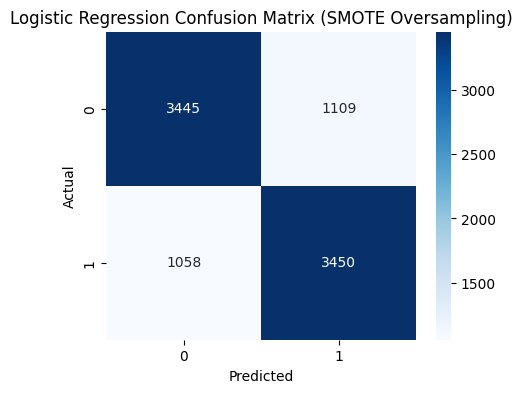


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4554
           1       0.87      0.89      0.88      4508

    accuracy                           0.88      9062
   macro avg       0.88      0.88      0.88      9062
weighted avg       0.88      0.88      0.88      9062



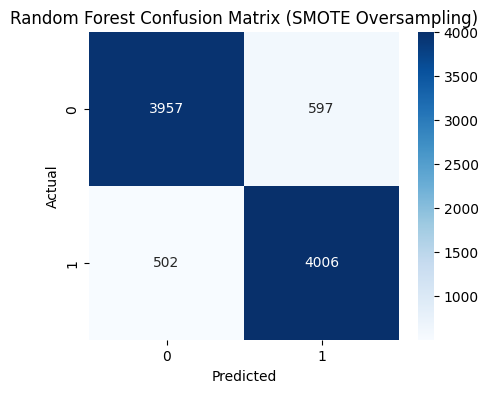


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      4554
           1       0.78      0.88      0.83      4508

    accuracy                           0.82      9062
   macro avg       0.83      0.82      0.82      9062
weighted avg       0.83      0.82      0.82      9062



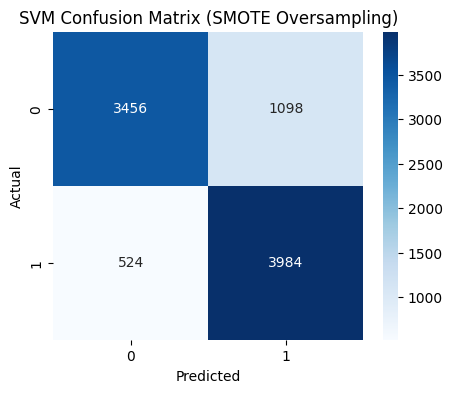


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      4554
           1       0.83      0.89      0.86      4508

    accuracy                           0.85      9062
   macro avg       0.86      0.85      0.85      9062
weighted avg       0.86      0.85      0.85      9062



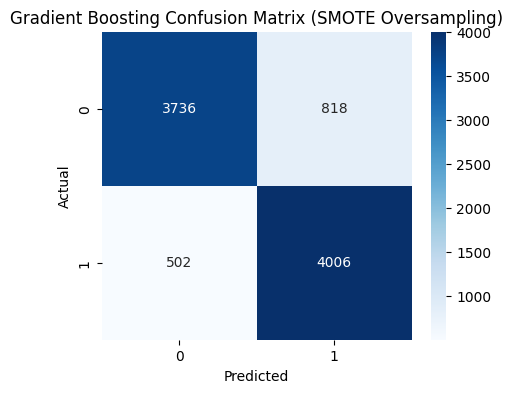


AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      4554
           1       0.80      0.86      0.83      4508

    accuracy                           0.83      9062
   macro avg       0.83      0.83      0.83      9062
weighted avg       0.83      0.83      0.82      9062



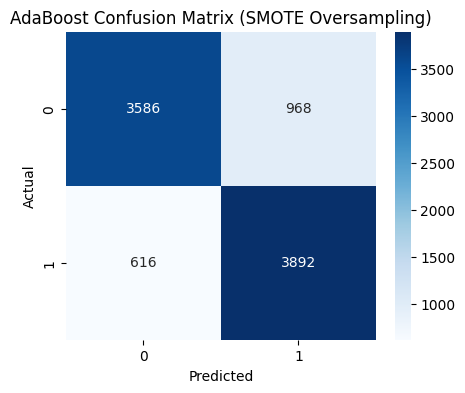

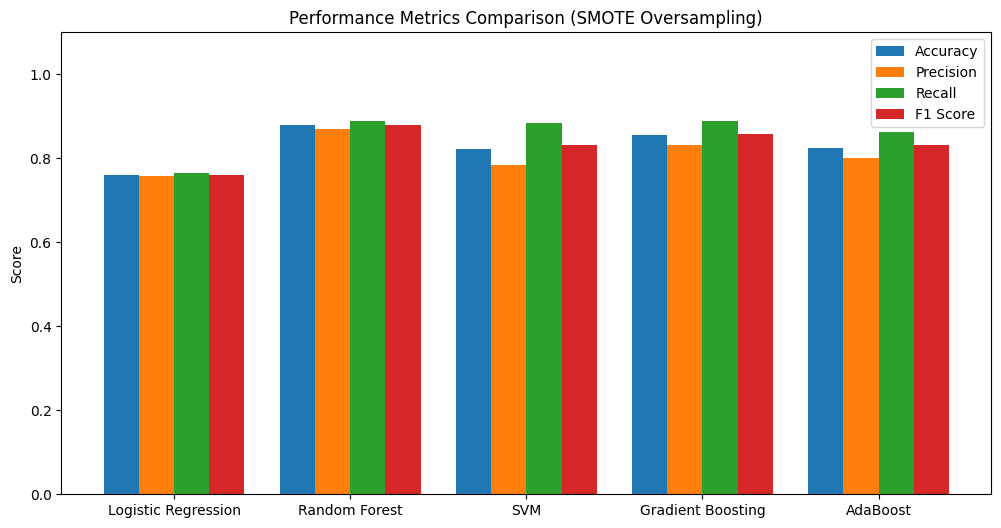


========================= Random Undersampling =========================

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1508
           1       0.75      0.78      0.76      1496

    accuracy                           0.76      3004
   macro avg       0.76      0.76      0.76      3004
weighted avg       0.76      0.76      0.76      3004



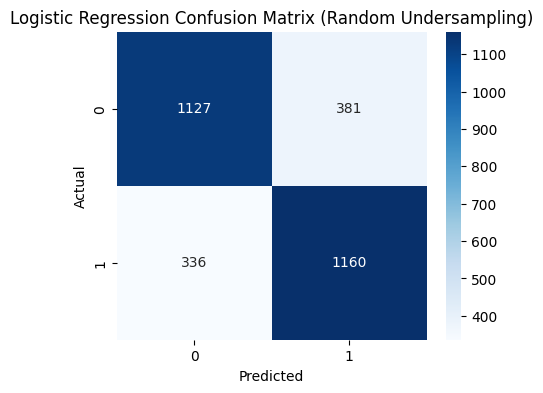


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1508
           1       0.81      0.83      0.82      1496

    accuracy                           0.82      3004
   macro avg       0.82      0.82      0.82      3004
weighted avg       0.82      0.82      0.82      3004



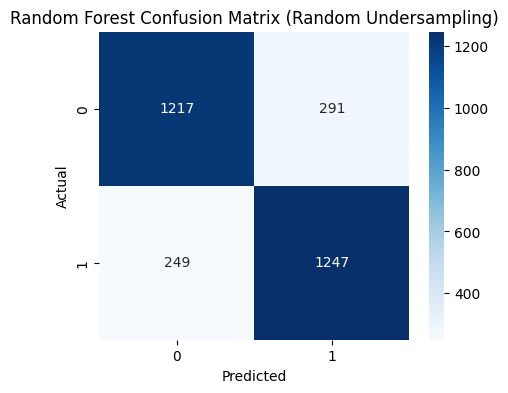


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      1508
           1       0.78      0.89      0.83      1496

    accuracy                           0.82      3004
   macro avg       0.83      0.82      0.82      3004
weighted avg       0.83      0.82      0.82      3004



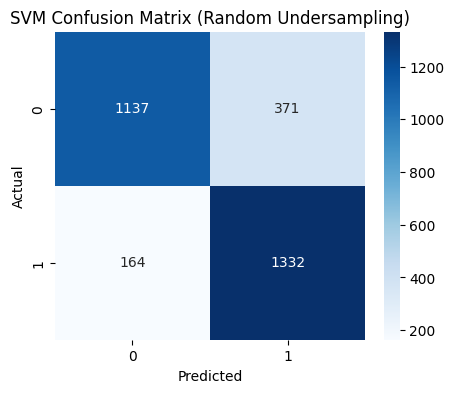


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1508
           1       0.84      0.88      0.86      1496

    accuracy                           0.86      3004
   macro avg       0.86      0.86      0.86      3004
weighted avg       0.86      0.86      0.86      3004



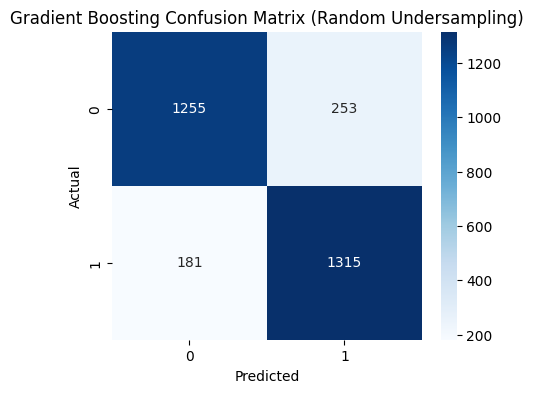


AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1508
           1       0.83      0.82      0.82      1496

    accuracy                           0.83      3004
   macro avg       0.83      0.83      0.83      3004
weighted avg       0.83      0.83      0.83      3004



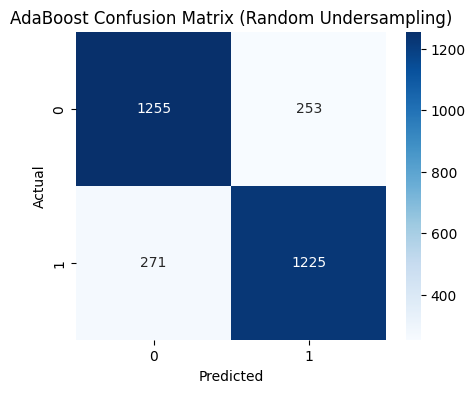

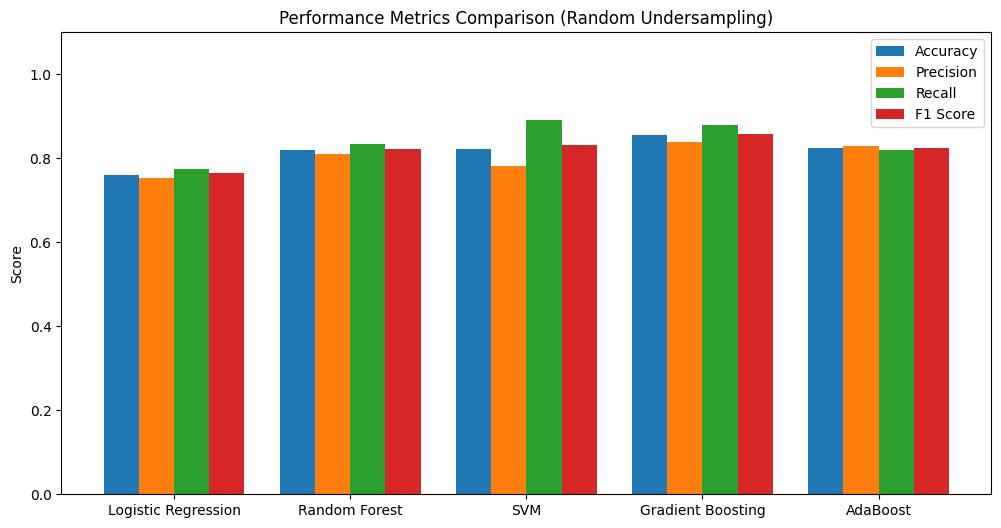

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_and_plot(X_data, y_data, label):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    metrics = {
        "Classifier": [],
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "F1 Score": []
    }

    print(f"\n{'='*25} {label} {'='*25}")

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Collect metrics
        metrics["Classifier"].append(name)
        metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["Precision"].append(precision_score(y_test, y_pred))
        metrics["Recall"].append(recall_score(y_test, y_pred))
        metrics["F1 Score"].append(f1_score(y_test, y_pred))

        print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))

        # Plot confusion matrix heatmap
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix ({label})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    # Plot metrics bar chart
    plt.figure(figsize=(12,6))
    x = metrics["Classifier"]
    plt.bar(x, metrics["Accuracy"], width=0.2, label='Accuracy', align='center')
    plt.bar([i + 0.2 for i in range(len(x))], metrics["Precision"], width=0.2, label='Precision', align='center')
    plt.bar([i + 0.4 for i in range(len(x))], metrics["Recall"], width=0.2, label='Recall', align='center')
    plt.bar([i + 0.6 for i in range(len(x))], metrics["F1 Score"], width=0.2, label='F1 Score', align='center')
    plt.xticks([i + 0.3 for i in range(len(x))], x)
    plt.ylim(0,1.1)
    plt.ylabel('Score')
    plt.title(f'Performance Metrics Comparison ({label})')
    plt.legend()
    plt.show()

# Run for SMOTE data
evaluate_and_plot(X_smote, y_smote, "SMOTE Oversampling")

# Run for Random Undersampling data
evaluate_and_plot(X_under, y_under, "Random Undersampling")


In [25]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 1. Load Dataset
df = pd.read_csv('/content/ai4i2020.csv')  # Make sure path is correct

# 2. Prepare features and target
target_col = 'Machine failure'
X = df.drop(columns=[target_col])

# Remove non-numeric column like 'UDI', 'Product ID' if present
non_numeric_cols = ['UDI', 'Product ID']
X = X.drop(columns=[col for col in non_numeric_cols if col in X.columns])

y = df[target_col]

# 3. One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# 4. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ========================
# Feature Extraction 1: PCA
# ========================
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

print("\n=== PCA-Based Feature Extraction ===")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

# ========================
# Feature Extraction 2: Autoencoder
# ========================
input_dim = X_train.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded_output = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded_output)
decoded = Dense(64, activation='relu')(decoded)
decoded_output = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded_output)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose=0)

# Encoder Model
encoder = Model(inputs=input_layer, outputs=encoded_output)
X_train_ae = encoder.predict(X_train)
X_test_ae = encoder.predict(X_test)

clf_ae = RandomForestClassifier(random_state=42)
clf_ae.fit(X_train_ae, y_train)
y_pred_ae = clf_ae.predict(X_test_ae)

print("\n=== Autoencoder-Based Feature Extraction ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ae))
print(classification_report(y_test, y_pred_ae))



=== PCA-Based Feature Extraction ===
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== Autoencoder-Based Feature Extraction ===
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000




--- Original Data ---
Accuracy: 0.8577929465301479
Classification Report:
               precision    recall  f1-score   support

        High       0.92      0.95      0.93       319
         Low       0.86      0.85      0.86       286
      Medium       0.78      0.76      0.77       274

    accuracy                           0.86       879
   macro avg       0.85      0.85      0.85       879
weighted avg       0.86      0.86      0.86       879



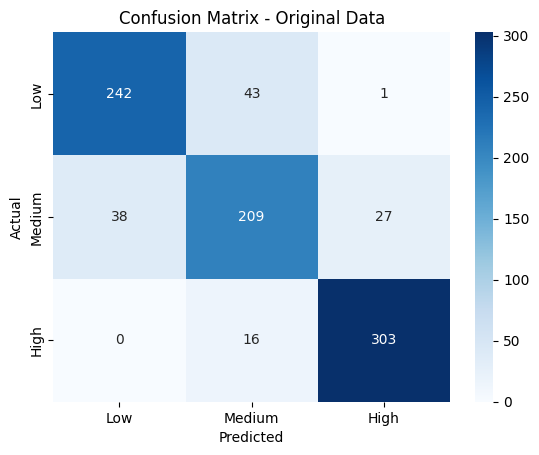


--- SMOTE Balanced ---
Accuracy: 0.850967007963595
Classification Report:
               precision    recall  f1-score   support

        High       0.92      0.94      0.93       319
         Low       0.86      0.83      0.84       286
      Medium       0.76      0.77      0.76       274

    accuracy                           0.85       879
   macro avg       0.85      0.85      0.85       879
weighted avg       0.85      0.85      0.85       879



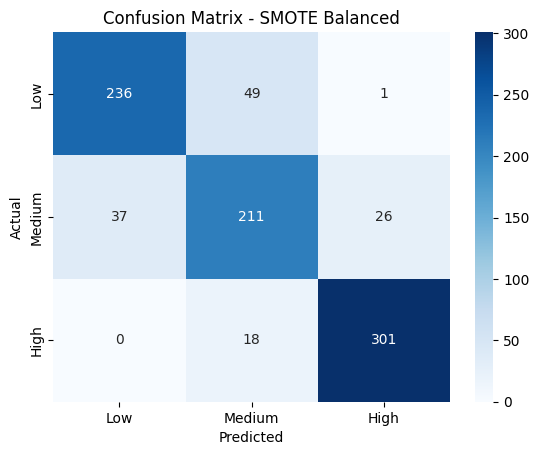


--- Random Under Sampling Balanced ---
Accuracy: 0.856655290102389
Classification Report:
               precision    recall  f1-score   support

        High       0.91      0.94      0.93       319
         Low       0.88      0.83      0.86       286
      Medium       0.77      0.78      0.77       274

    accuracy                           0.86       879
   macro avg       0.85      0.85      0.85       879
weighted avg       0.86      0.86      0.86       879



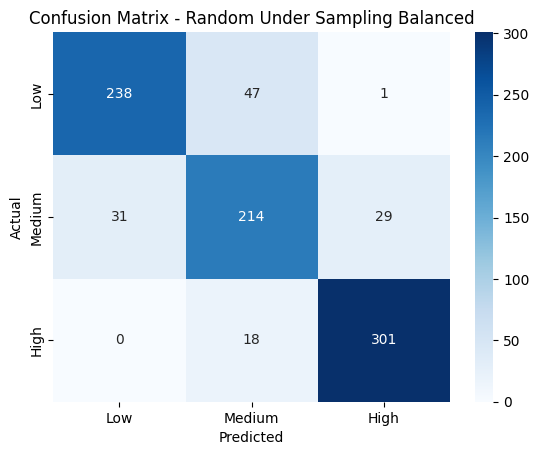

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset
url = "/content/AmesHousing.csv"
df = pd.read_csv(url)

# 2. Bin 'SalePrice' into categorical classes
df = df.dropna(subset=['SalePrice'])
df['PriceCategory'] = pd.qcut(df['SalePrice'], q=3, labels=["Low", "Medium", "High"])

# 3. Save target and drop irrelevant columns
y = df['PriceCategory']
df = df.drop(columns=['SalePrice', 'Order', 'PriceCategory'], errors='ignore')

# 4. Use only numeric features and drop NaNs
X = df.select_dtypes(include=[np.number]).dropna(axis=1)

# 5. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Function to evaluate model
def evaluate_model(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    print(f"\n--- {title} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 7. Original Imbalanced Data
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)
evaluate_model(clf_original, X_test, y_test, "Original Data")

# 8. SMOTE (Over-Sampling)
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train, y_train)

clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_res_smote, y_res_smote)
evaluate_model(clf_smote, X_test, y_test, "SMOTE Balanced")

# 9. Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_res_rus, y_res_rus = rus.fit_resample(X_train, y_train)

clf_rus = RandomForestClassifier(random_state=42)
clf_rus.fit(X_res_rus, y_res_rus)
evaluate_model(clf_rus, X_test, y_test, "Random Under Sampling Balanced")


Web APP


In [27]:
!pip install flask
!pip install pyngrok



In [28]:
!pip install flask pyngrok joblib --quiet


In [32]:
from flask import Flask, request, render_template_string
from pyngrok import ngrok
import joblib

# Load the trained model
adult_model = joblib.load("/content/adult_cencus_income")

# Labels for reference (not used in form rendering since we use hardcoded fields)
adult_labels = [
    "age", "education_num", "hours_per_week", "capital_gain", "capital_loss",
    "workclass", "occupation", "marital_status", "relationship", "native_country"
]

app = Flask(__name__)

HTML_TEMPLATE = """<!DOCTYPE html>
<html>
<head>
  <title>Adult Income Prediction</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      margin: 20px;
      background-color: #f4f6f9;
    }
    h2 { color: #333; }
    .form-section {
      background-color: white;
      padding: 20px;
      border-radius: 8px;
      border: 1px solid #ccc;
      max-width: 600px;
    }
    input, select {
      width: 100%;
      padding: 8px;
      margin: 6px 0 12px 0;
      border: 1px solid #ccc;
      border-radius: 4px;
    }
    input[type="submit"] {
      background-color: #4CAF50;
      color: white;
      font-weight: bold;
      border: none;
      cursor: pointer;
    }
    input[type="submit"]:hover {
      background-color: #45a049;
    }
    label { font-weight: bold; }
    .prediction {
      margin-top: 20px;
      padding: 10px;
      font-size: 18px;
      font-weight: bold;
      border-radius: 5px;
    }
    .prediction.positive { color: green; }
    .prediction.negative { color: red; }
  </style>
</head>
<body>

<h2>Adult Income Prediction Form</h2>
<div class="form-section">
  <form method="POST">
    <input type="hidden" name="dataset" value="adult">

    <label>Age</label>
    <input name="adult_f0" type="number" required>

    <label>Education Number</label>
    <input name="adult_f1" type="number" required>

    <label>Hours per Week</label>
    <input name="adult_f2" type="number" required>

    <label>Capital Gain</label>
    <input name="adult_f3" type="number" required>

    <label>Capital Loss</label>
    <input name="adult_f4" type="number" required>

    <label>Workclass</label>
    <select name="adult_f5">
      <option value="0">Private</option>
      <option value="1">Self-emp-not-inc</option>
      <option value="2">Self-emp-inc</option>
      <option value="3">Federal-gov</option>
      <option value="4">Local-gov</option>
      <option value="5">State-gov</option>
      <option value="6">Without-pay</option>
    </select>

    <label>Occupation</label>
    <select name="adult_f6">
      <option value="0">Tech-support</option>
      <option value="1">Craft-repair</option>
      <option value="2">Other-service</option>
      <option value="3">Sales</option>
      <option value="4">Exec-managerial</option>
      <option value="5">Prof-specialty</option>
    </select>

    <label>Marital Status</label>
    <select name="adult_f7">
      <option value="0">Never-married</option>
      <option value="1">Married-civ-spouse</option>
      <option value="2">Divorced</option>
      <option value="3">Separated</option>
      <option value="4">Widowed</option>
      <option value="5">Married-spouse-absent</option>
    </select>

    <label>Relationship</label>
    <select name="adult_f8">
      <option value="0">Wife</option>
      <option value="1">Own-child</option>
      <option value="2">Husband</option>
      <option value="3">Not-in-family</option>
      <option value="4">Other-relative</option>
      <option value="5">Unmarried</option>
    </select>

    <label>Native Country</label>
    <select name="adult_f9">
      <option value="0">United-States</option>
      <option value="1">Mexico</option>
      <option value="2">Philippines</option>
      <option value="3">Germany</option>
      <option value="4">Canada</option>
    </select>

    <input type="submit" value="Predict">
  </form>

  {% if prediction %}
    <div class="prediction {{ 'positive' if prediction_class == 1 else 'negative' }}">
      Prediction: {{ prediction }}
    </div>
  {% endif %}
</div>
</body>
</html>
"""

@app.route("/", methods=["GET", "POST"])
def predict():
    prediction = None
    prediction_class = None
    if request.method == "POST":
        try:
            inputs = [float(request.form[f"adult_f{i}"]) for i in range(10)]
            prediction_class = int(adult_model.predict([inputs])[0])
            prediction = "More than $50K" if prediction_class == 1 else "Less than or equal to $50K"
        except Exception as e:
            prediction = f"Error: {e}"

    return render_template_string(HTML_TEMPLATE,
                                  prediction=prediction,
                                  prediction_class=prediction_class)

# Start NGROK tunnel
ngrok.set_auth_token("2xaPL5CTS6AO8zMkVEM59hziYeW_5QjAWmmk6UL4uRsxHvPD2")
ngrok.kill()
public_url = ngrok.connect(5000)
print("Your app is live here:", public_url)

# Run Flask app
app.run(port=5000)


Your app is live here: NgrokTunnel: "https://f560-34-48-81-233.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [26/May/2025 15:01:32] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/May/2025 15:01:33] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [26/May/2025 15:05:12] "POST / HTTP/1.1" 200 -
